## 作业1：跳伞运动员仿真
   一名高空跳伞运动员从飞机上跳下，能够确定海拔高度和运动员自由下落的速度吗？在上一个实例中，炮弹总是保持$500m/s$的水平初速度（知道落入海中）。实际情况下，空气的摩擦阻力将使炮弹减速。同样，作用在运动员身上的重力同样受到空气摩擦力的影响，并随着运动员速度的增加而变大。最终，这一阻力将导致向上的摩擦力与向下的重力平衡，使合外力为零。在这一点，运动员将不再加速并保持稳态速度。
    根据基本空气动力学理论，运动员所受阻力由下式表示：
$$drag={1\over2}\rho v^2SC_d$$
式中，$\rho$为空气密度，$v$为速度，$S$为表面积，$C_d$为阻力系数。
    该公式的计算显然比较复杂。首先，空气密度$\rho$随着海拔高度而变化；第二，总阻力随着速度的平方变化；第三，运动员的表面积随着其运动而变化；最后，阻力系数取决于运动员伞具采用材料的摩擦力系数。这四个变量都是非线性的，因此很难推导出这个公式的显式解。
    为简化这个问题，假设$\rho=1.225kg/m^3$，$S=1.0m^2$，$C_d=0.05$，因此仅有$v$为非线性项。使用Euler法模拟整个运动过程，而不是直接求解公式。
    改变伞打开的时间，观察跳伞运动员的运动状态变化。

In [25]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

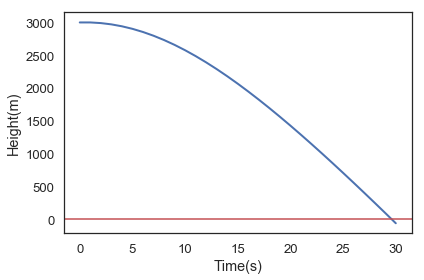

In [26]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram

g = 9.8 * m/s**2
Rho = 1.225 * kg/m**3
S = 1.0 * m**2
Cd = 0.05
mp = 85.0 * kg



init_z = State(y=3000.0 * m, v=0.0 * m/s)


t_end = 30 * s
dt = 1 * s


system_z = System(init = init_z, g = g  , t_end = t_end, dt = dt)


def slope_func_z(state, t, system):
    y, v = state
    drag = 0.5 * Rho * v * v * Cd * S
    dydt = v
    dvdt = -system.g + drag / mp
    
    return dydt, dvdt



Vz, Az = slope_func_z(system_z.init, 0, system_z)


results_z, details_z = run_euler(system_z, slope_func_z)


plot(results_z.y)

decorate(xlabel='Time(s)',
         ylabel='Height(m)')

plt.axhline(y=0, color='r', linestyle='-')
plt.show()




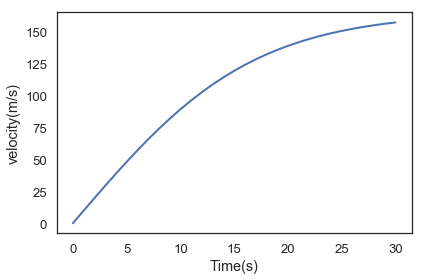

In [27]:

plot(-results_z.v)

decorate(xlabel='Time(s)',
         ylabel='velocity(m/s)')

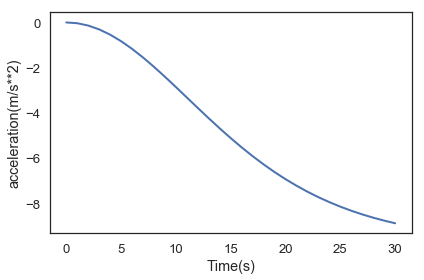

In [28]:
plot(-0.030625*(results_z.v*results_z.v)/85)

decorate(xlabel='Time(s)',
         ylabel='acceleration(m/s**2)')